In [1]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib, pandas

/Users/eric/anaconda2/lib/python2.7/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 2.7.11 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.1.2
OS Darwin 15.5.0 x86_64 i386 64bit
numpy 1.10.4
scipy 0.17.0
matplotlib 1.5.1
pandas 0.17.1
Sun Jun 05 18:17:20 2016 PDT

In [2]:
# Couldn't find what to do with 'magic' imports at the top

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina' 

# Add this to python2 code to make life easier
from __future__ import absolute_import, division, print_function

from itertools import combinations
import string

from IPython.display import IFrame, HTML, YouTubeVideo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

sns.set();
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("darkgrid")
sns.set_context("poster", font_scale=1.3)

In [3]:
posts_ifn = './data/2016-05-01/posts.csv'

In [4]:
posts_df = pd.read_csv(posts_ifn)

In [5]:
posts_df['CreationDate'] = pd.to_datetime(posts_df['CreationDate'])

In [6]:
posts_df.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,37483588,2,NaN,37481604,2016-05-27 12:27:08,NaN,0,NaN,<p>ZF2 seems not to provide a solution for thi...,2019043,...,NaN,2016-05-27 16:25:00,2016-05-27 16:25:00,NaN,NaN,NaN,0,NaN,NaN,NaN
1,37483590,1,NaN,NaN,2016-05-27 12:27:12,NaN,3,41,<p>I am trying to run migrations with custom D...,994154,...,NaN,2016-05-27 17:37:51,2016-05-27 17:37:51,Provide an implementation of IDbContextFactory...,<c#><entity-framework><ef-migrations>,1,2,NaN,NaN,NaN
2,37483591,2,NaN,3997152,2016-05-27 12:27:16,NaN,0,NaN,"<p>There is a better way to do this: ""Project ...",NaN,...,NaN,NaN,2016-05-27 12:27:16,NaN,NaN,NaN,0,NaN,NaN,NaN
3,37483592,1,37484133,NaN,2016-05-27 12:27:21,NaN,-1,45,<p>I have the following date forma string: <co...,1935371,...,NaN,NaN,2016-05-27 13:03:45,Parsing Datetime in PHP,<php><datetime>,3,4,NaN,NaN,NaN
4,37483593,1,37483920,NaN,2016-05-27 12:27:23,NaN,0,44,<p>I have a script that lists all the director...,3055536,...,NaN,NaN,2016-05-27 13:36:29,How to highlight current link in foreach loop,<php><html><if-statement><foreach>,4,1,NaN,NaN,NaN


## Elapsed time to get the first answer

In [7]:
posts_df.columns

Index([u'Id', u'PostTypeId', u'AcceptedAnswerId', u'ParentId', u'CreationDate',
       u'DeletionDate', u'Score', u'ViewCount', u'Body', u'OwnerUserId',
       u'OwnerDisplayName', u'LastEditorUserId', u'LastEditorDisplayName',
       u'LastEditDate', u'LastActivityDate', u'Title', u'Tags', u'AnswerCount',
       u'CommentCount', u'FavoriteCount', u'ClosedDate',
       u'CommunityOwnedDate'],
      dtype='object')

In [8]:
posts_df[~posts_df.AcceptedAnswerId.isnull()].head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
3,37483592,1,37484133,NaN,2016-05-27 12:27:21,NaN,-1,45,<p>I have the following date forma string: <co...,1935371,...,NaN,NaN,2016-05-27 13:03:45,Parsing Datetime in PHP,<php><datetime>,3,4,NaN,NaN,NaN
4,37483593,1,37483920,NaN,2016-05-27 12:27:23,NaN,0,44,<p>I have a script that lists all the director...,3055536,...,NaN,NaN,2016-05-27 13:36:29,How to highlight current link in foreach loop,<php><html><if-statement><foreach>,4,1,NaN,NaN,NaN
5,37483594,1,37483679,NaN,2016-05-27 12:27:23,NaN,1,49,<p>I'll start off by saying i'm brand new to C...,6390902,...,NaN,NaN,2016-05-27 13:23:51,Gigantic numbers are being put into my array a...,<c><arrays>,1,0,NaN,NaN,NaN
6,37483595,1,37484116,NaN,2016-05-27 12:27:23,NaN,1,24,<p>I have a JS single-page app that uses the h...,2420744,...,NaN,NaN,2016-05-27 12:55:00,How to detect if on the first url of page load?,<javascript><single-page-application><browser-...,2,1,NaN,NaN,NaN
12,37483604,1,37484212,NaN,2016-05-27 12:27:42,NaN,0,26,"<p>I have problem, after insert or update in m...",3501587,...,NaN,2016-05-27 13:06:32,2016-05-27 13:06:32,Symfony3 cache (Warning: rename) after update,<php><symfony2><caching><warnings><symfony3>,1,0,NaN,NaN,NaN


In [9]:
posts_df[posts_df.Id == 37484133]

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
1441,37484133,2,NaN,37483592,2016-05-27 12:55:35,NaN,0,NaN,<p>Example:</p>\n\n<pre><code>$date = new Date...,6388036,...,NaN,2016-05-27 13:03:45,2016-05-27 13:03:45,NaN,NaN,NaN,2,NaN,NaN,NaN


In [10]:
asked_questions = posts_df[posts_df.ParentId.isnull()]

In [11]:
answers = posts_df[posts_df.ParentId.isin(asked_questions.Id)]

In [12]:
first_answers = answers.groupby('ParentId').apply(lambda g: g.sort_values('CreationDate').iloc[0])[['ParentId', 'CreationDate']]

In [13]:
first_answers.head()

,ParentId,CreationDate
ParentId,,
37048478,37048478,2016-05-05 14:00:47
37048480,37048480,2016-05-05 10:48:15
37048489,37048489,2016-05-05 11:12:03
37048494,37048494,2016-05-05 11:04:44
37048497,37048497,2016-05-05 10:53:07


In [14]:
asked_and_answered = pd.merge(first_answers, asked_questions[['Id', 'CreationDate']], 
                              left_on='ParentId', right_on='Id')

In [15]:
asked_and_answered.head()

,ParentId,CreationDate_x,Id,CreationDate_y
0,37048478,2016-05-05 14:00:47,37048478,2016-05-05 10:42:42
1,37048480,2016-05-05 10:48:15,37048480,2016-05-05 10:42:43
2,37048489,2016-05-05 11:12:03,37048489,2016-05-05 10:43:15
3,37048494,2016-05-05 11:04:44,37048494,2016-05-05 10:43:19
4,37048497,2016-05-05 10:53:07,37048497,2016-05-05 10:43:23


In [16]:
asked_and_answered['ElapsedTime'] = (asked_and_answered['CreationDate_x'] - 
                                      asked_and_answered['CreationDate_y']).astype('timedelta64[m]')

In [17]:
asked_and_answered.head()

,ParentId,CreationDate_x,Id,CreationDate_y,ElapsedTime
0,37048478,2016-05-05 14:00:47,37048478,2016-05-05 10:42:42,198
1,37048480,2016-05-05 10:48:15,37048480,2016-05-05 10:42:43,5
2,37048489,2016-05-05 11:12:03,37048489,2016-05-05 10:43:15,28
3,37048494,2016-05-05 11:04:44,37048494,2016-05-05 10:43:19,21
4,37048497,2016-05-05 10:53:07,37048497,2016-05-05 10:43:23,9


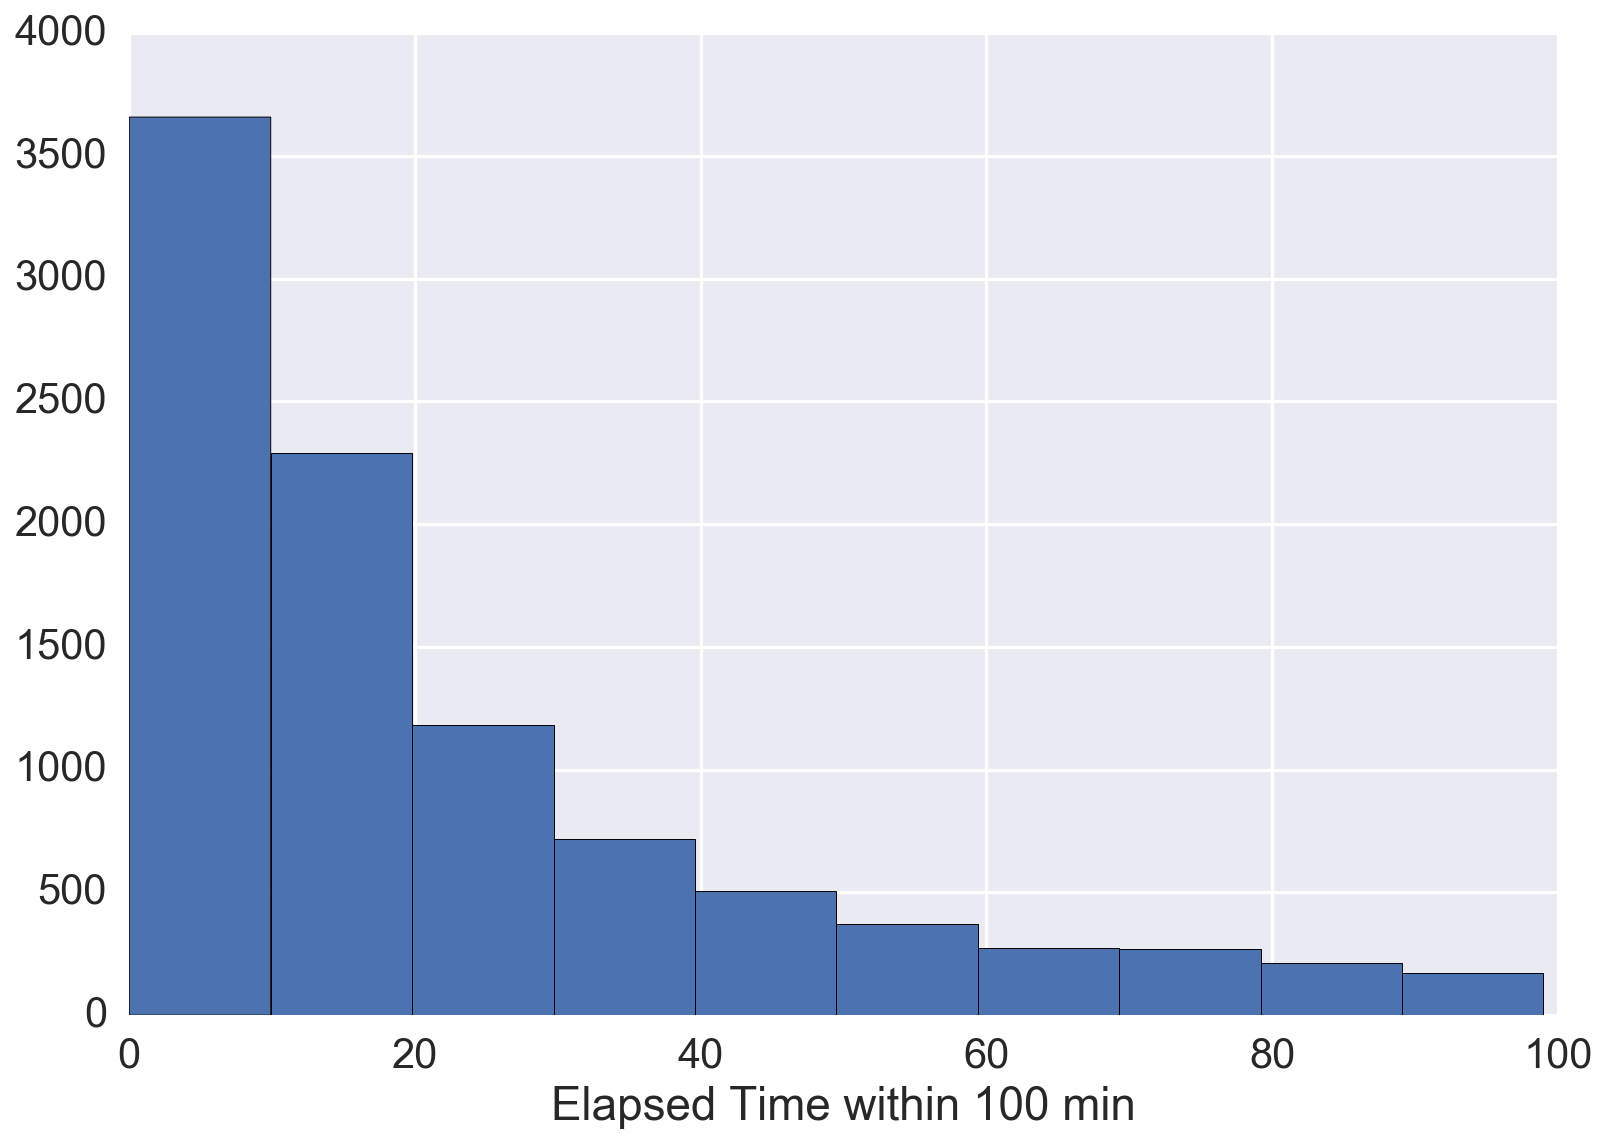

In [18]:
asked_and_answered[asked_and_answered.ElapsedTime < 100]['ElapsedTime'].hist()
plt.xlabel('Elapsed Time within 100 min')

## TODO: Elapsed time get the answer that will be accepted